## Yucatan Hurricane Analysis

The following data comes from a LTER study mesuring the uses a cumputer model to quantify impacts of hurricanes accross time in the yucatan peninsula

## Citation
Boose, E. and D. Foster. 2023. Ecological Impacts of Hurricanes Across the Yucatan Peninsula 1851-2000 ver 23. Environmental Data Initiative. https://doi.org/10.6073/pasta/f219113373913f2daf421732e28d3c38 (Accessed 2025-10-24).

## Data Accsess:
https://portal.edirepository.org/nis/mapbrowse?packageid=knb-lter-hfr.71.23

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/hf071-01-hurricanes.csv")
print(df.head())
print(df.dtypes)
print(df["number"].unique())

    code  start.date    end.date  number name  ss track rf.max
0  Y1852  1852-10-07  1852-10-08       5  NaN   2     O     F1
1  Y1857  1857-09-28  1857-09-28       4  NaN   2     N     F1
2  Y1861  1861-08-17  1861-08-17       2  NaN   1     O     Nd
3  Y1864  1864-08-31  1864-08-31       3  NaN   1     S     F1
4  Y1865  1865-09-11  1865-09-11       4  NaN   2     O     F1
code          object
start.date    object
end.date      object
number         int64
name          object
ss             int64
track         object
rf.max        object
dtype: object
[ 5  4  2  3 11  7  6  8 10  1 13 14 15  9 17]


## Brainstorm

- make the start.date and end.date columns as datetime
- filter for catagory 5
- make new column with duration subtract the end and start
- group by number column 
- print count of columns

### Potantial challenged: 
- converting end and start date to datetime, finding the duration

## Data Wrangling

In [2]:
df['start.date'] = pd.to_datetime(df['start.date'])
df['end.date'] = pd.to_datetime(df['end.date'])
df.dtypes

code                  object
start.date    datetime64[ns]
end.date      datetime64[ns]
number                 int64
name                  object
ss                     int64
track                 object
rf.max                object
dtype: object

In [3]:
df_5 = df[df['ss'] == 5].copy()
df_5['Duration'] = df_5['end.date'] - df_5['start.date']

In [4]:
df_5.head()

,code,start.date,end.date,number,name,ss,track,rf.max,Duration
76,Y1955b,1955-09-28,1955-09-28,10,Janet,5,N,F3,0 days
96,Y1980a,1980-08-07,1980-08-08,1,Allen,5,O,F3,1 days
98,Y1988,1988-09-14,1988-09-15,8,Gilbert,5,N,F3,1 days
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1,1 days


In [5]:
print(df_5["Duration"].count())

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (3743061765.py, line 1)

## Visualize Saffir-Simpson categories across time

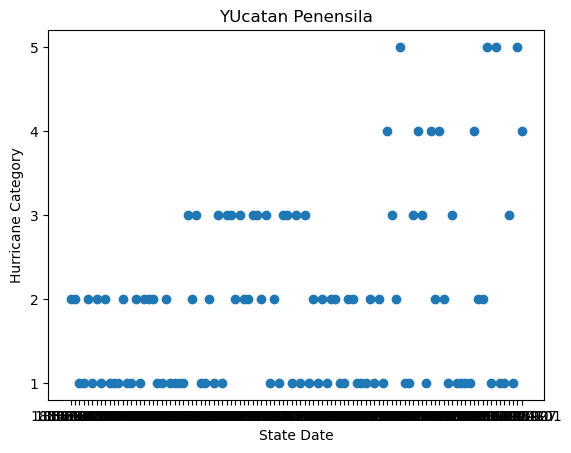

In [31]:
plt.scatter(df["start.date"], df["ss"])
plt.yticks([1,2,3,4,5])
plt.xlabel("State Date")
plt.ylabel("Hurricane Category")
plt.title("YUcatan Penensila")
plt.show()